In [134]:
x = [
    (17767, 60, 267),
    (17768, 134, 583),
    (17769, 45, 115),
    (17770, 38, 135),
    (17771, 28, 86),
    (17772, 26, 70),
    (17773, 107, 445),
    (17774, 82, 391),
    (17775, 85, 389),
    # (17776, 10, 42),
]

In [135]:
import seaborn as sns
import pandas as pd

In [140]:
data = pd.DataFrame({
    'time': [i[0] for i in x],
    'unique': [i[1] for i in x],
    'messages': [i[2] for i in x],
})

In [32]:
data.head()

,time,unique,views
0,17767,60,267
1,17768,134,583
2,17769,45,115
3,17770,38,135
4,17771,28,86


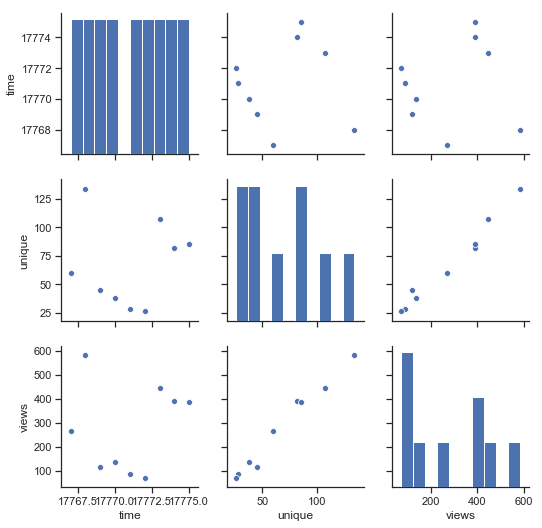

In [31]:
sns.pairplot(data=data, ) # , hue="species")

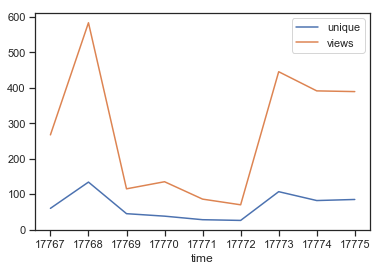

In [34]:
data['time'] = []
data.plot(x='time')

In [37]:
plotly_df(data)

NameError: name 'plotly_df' is not defined

In [132]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        if column != 'time':
            trace = go.Scatter(
                x = df.time,
                y = df[column],
                mode = 'lines',
                name = column
            )
            data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

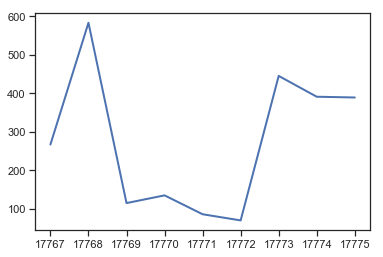

In [49]:
import matplotlib.pyplot as plt
plt.plot(data['time'], data['views'], lw=2)

In [50]:
import scipy

In [58]:
scipy.interpolate.interp1d(x=data['time'], y=data['views'])

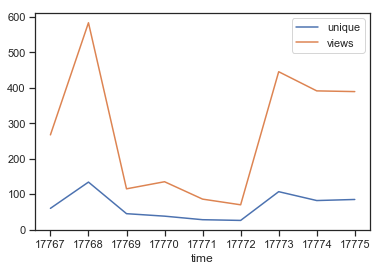

In [55]:
data = data.interpolate(method='cubic')
data.plot(x='time')

In [59]:
re1 = data.resample('time').interpolate(method='cubic')
re1.plot(x='time')

ValueError: Invalid frequency: time

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


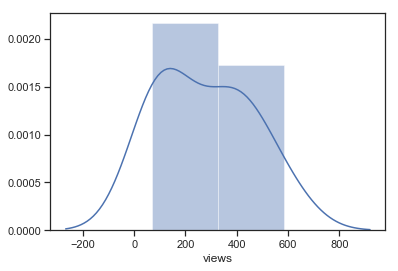

In [60]:
sns.distplot(data['views'])

In [73]:
x2 = list(list(i) for i in x + [x[-1]])
x2[-1][0] += 1

In [80]:
unique = []
views = []

for i in x:
    unique += [i[0]] * i[1]
    views += [i[0]] * i[2]

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


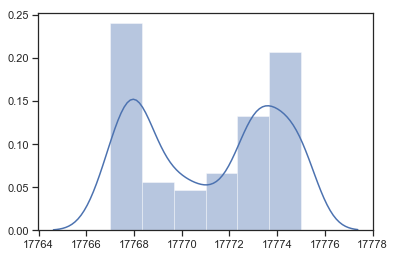

In [81]:
sns.distplot(unique)

In [82]:
data.rolling_mean()

AttributeError: 'DataFrame' object has no attribute 'rolling_mean'

In [122]:
x3 = []
for i in x:
    for j in range(100):
        l = i[0] + 0.01 * j
        x3.append([l, i[1], i[2]])

data2 = pd.DataFrame({
    'time': [i[0] for i in x3],
    'unique': [i[1] for i in x3],
    'views': [i[2] for i in x3],
})

data2.head()

,time,unique,views
0,17767.00,60,267
1,17767.01,60,267
2,17767.02,60,267
3,17767.03,60,267
4,17767.04,60,267


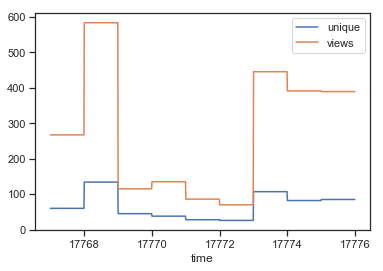

In [123]:
data2.plot(x='time')

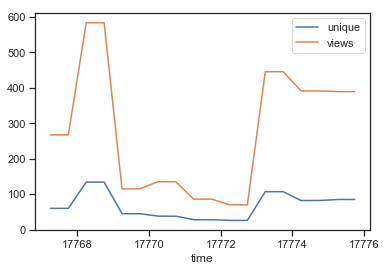

In [127]:
data2.rolling(50).mean().plot(x='time')

In [133]:
plotly_df(data2)

In [141]:
import time

In [142]:
data3 = data
data3['time'] = [time.strftime('%d %b', time.gmtime(i * 60 * 60 * 24)) for i in data3['time']]
plotly_df(data3)